In [1]:
import pandas as pd
from functions import check_nan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Imported the necessary libraries and functions. Also stated that I want both the columns and rows to be shown fully. 

In [2]:
old_HDD_ori = pd.read_csv('../data/original/old_HDD.csv')
old_HDD_ori.shape

(1000, 5)

Importing the file and checking the original shape before I start cleaning. 

In [3]:
old_HDD=old_HDD_ori.copy()
old_HDD.head()

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14


Created a copy of the file. This is where I will do all the cleaning for security reasons and also so I can compare the original size with the size of the file I will be working on. 

'N nan cols: 0'

Series([], dtype: float64)

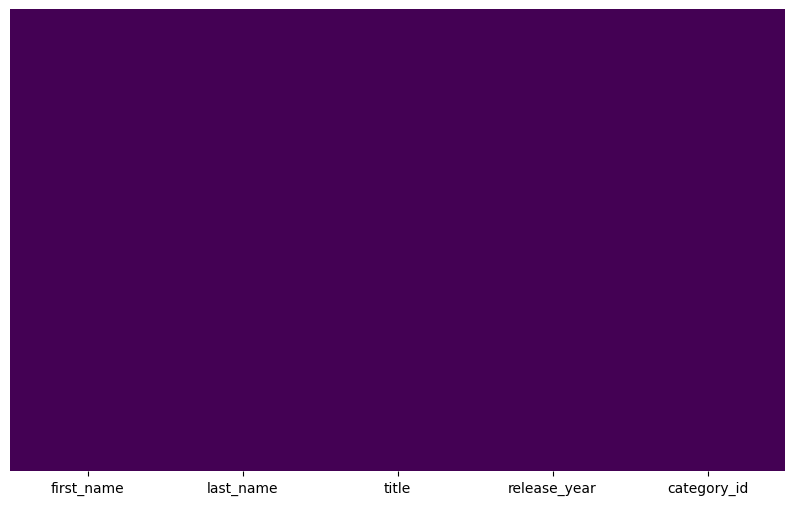

In [4]:
check_nan(old_HDD)

No nulls in the dataset 

In [5]:
old_HDD.duplicated().any()

False

No duplicated rows in the dataset

In [6]:
old_HDD["first_name"].value_counts()

SANDRA       56
VAL          35
UMA          35
JULIA        33
RIP          33
HELEN        32
KARL         31
WOODY        31
VIVIEN       30
LUCILLE      30
GRACE        30
JOHNNY       29
BURT         29
ALEC         29
CUBA         28
KIRSTEN      27
FRED         27
ELVIS        26
ZERO         25
BOB          25
NICK         25
AUDREY       25
JOE          25
TOM          25
MILLA        24
CAMERON      24
TIM          23
DAN          22
ED           22
JENNIFER     22
CHRISTIAN    22
KEVIN        21
MATTHEW      20
BETTE        20
PENELOPE     19
SISSY        18
JUDY         15
GOLDIE        7
Name: first_name, dtype: int64

Column first_name looks fine. Format is consistent. 

In [7]:
old_HDD["last_name"].value_counts()

OLIVIER         53
PECK            43
KILMER          37
BOLGER          35
WOOD            35
MCQUEEN         33
CRAWFORD        33
VOIGHT          32
BERRY           31
HOFFMAN         31
BERGEN          30
MOSTEL          30
TRACY           30
WAYNE           29
DUKAKIS         29
LOLLOBRIGIDA    29
PALTROW         27
COSTNER         27
MARX            26
MCKELLEN        25
SWANK           25
WAHLBERG        25
CAGE            25
FAWCETT         25
STREEP          24
HACKMAN         23
GABLE           22
DAVIS           22
TORN            22
CHASE           22
BLOOM           21
NICHOLSON       20
JOHANSSON       20
GUINESS         19
SOBIESKI        18
DEAN            15
BRODY            7
Name: last_name, dtype: int64

Column last_name looks fine. Format is consistent. 

In [8]:
old_HDD["title"].value_counts()

BOONDOCK BALLROOM              6
FLASH WARS                     5
STRANGER STRANGERS             5
OKLAHOMA JUMANJI               5
CHITTY LOCK                    5
CONEHEADS SMOOCHY              5
KRAMER CHOCOLATE               4
IMAGE PRINCESS                 4
NECKLACE OUTBREAK              4
WEDDING APOLLO                 4
ACADEMY DINOSAUR               4
DESTINY SATURDAY               4
SOLDIERS EVOLUTION             4
CALENDAR GUNFIGHT              4
TELEMARK HEARTBREAKERS         4
CLASH FREDDY                   4
LOVELY JINGLE                  4
POLISH BROOKLYN                4
RINGS HEARTBREAKERS            4
EMPIRE MALKOVICH               4
SPLASH GUMP                    4
SCORPION APOLLO                3
REAR TRADING                   3
UPTOWN YOUNG                   3
DROP WATERFRONT                3
CYCLONE FAMILY                 3
CUPBOARD SINNERS               3
COAST RAINBOW                  3
ARABIA DOGMA                   3
HUMAN GRAFFITI                 3
KING EVOLU

Column title looks fine. Format is consistent. 

In [9]:
old_HDD["release_year"].value_counts()

2006    1000
Name: release_year, dtype: int64

In [10]:
old_HDD=old_HDD.drop(columns="release_year")

Dropped column release_year since it only had 1 unique value. It was constant.

In [11]:
#old_HDD_id = [i for i in range(1, old_HDD.shape[0]+1)]
#new_column_name="old_HDD_id"
#old_HDD.insert(0,new_column_name, old_HDD_id )


dataframe old_HDD does not have a column I can use as a primary key so I created it. 

In [12]:
old_HDD.shape

(1000, 4)

In [13]:
old_HDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   first_name   1000 non-null   object
 1   last_name    1000 non-null   object
 2   title        1000 non-null   object
 3   category_id  1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [14]:
for c in old_HDD.select_dtypes(include="integer"):
    
    old_HDD[c]=pd.to_numeric(old_HDD[c], downcast="integer")

In [15]:
old_HDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   first_name   1000 non-null   object
 1   last_name    1000 non-null   object
 2   title        1000 non-null   object
 3   category_id  1000 non-null   int8  
dtypes: int8(1), object(3)
memory usage: 24.5+ KB


Downcasted integer typed columns (category_id)

In [16]:
print("the original shape was:", old_HDD_ori.shape, "the shape now is:" , old_HDD.shape)

the original shape was: (1000, 5) the shape now is: (1000, 4)


In [17]:
old_HDD.to_csv("../data/cleaned/old_HDD_clean.csv", index=False)


Saved clean file.